In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.0,45.0,27.0,31.0,0.0
1,85,64.0,59.0,32.0,23.0,0.0
2,86,54.0,33.0,16.0,54.0,0.0
3,91,78.0,34.0,24.0,36.0,0.0
4,98,55.0,NaN,17.0,NaN,NaN
...,...,...,...,...,...,...
340,91,54.0,25.0,22.0,35.0,4.0
341,89,48.0,32.0,22.0,14.0,4.0
342,85,52.0,22.0,23.0,34.0,4.0
343,95,93.0,21.0,27.0,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	11
float64		column 3	45
float64		column 4	45
float64		column 5	44
float64		column 6	56


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,345.000000,334.000000,300.000000,300.000000,301.000000,289.000000
mean,90.159420,69.802395,29.813333,24.320000,38.378738,3.340830
std,4.448096,18.362463,19.492692,9.417354,40.033187,3.125654
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,24.000000,3.000000
75%,93.000000,79.750000,33.000000,27.000000,44.000000,5.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

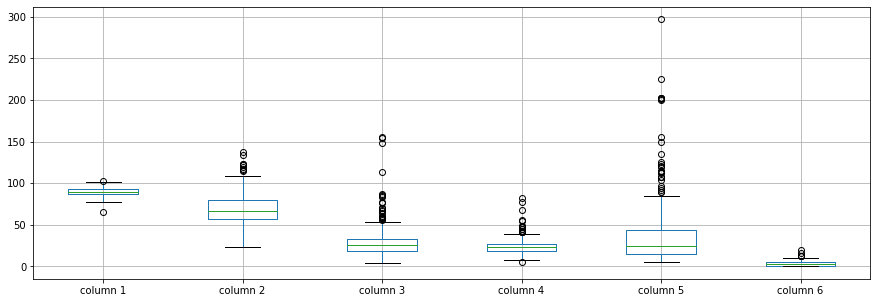

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.159420
column 2    69.802395
column 3    29.813333
column 4    24.320000
column 5    38.378738
column 6     3.340830
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.033218,0.106637,0.136654,0.207532,0.292427
column 2,0.033218,1.000000,0.033577,0.108316,0.122485,0.097406
column 3,0.106637,0.033577,1.000000,0.705465,0.442531,0.176434
column 4,0.136654,0.108316,0.705465,1.000000,0.483395,0.260784
column 5,0.207532,0.122485,0.442531,0.483395,1.000000,0.276331
column 6,0.292427,0.097406,0.176434,0.260784,0.276331,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [6,6+46,6+46+46,6+46+46+46,6+46+46+46+46,6+46+46+46,6+46+46,6+46,6], vae_layer = False, seed = 460)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 262.77395920526413
Epoch: 1 , loss: 262.66639709472656
Epoch: 2 , loss: 261.52527509416853
Epoch: 3 , loss: 262.3902507963635
Epoch: 4 , loss: 263.0023709251767
Epoch: 5 , loss: 262.0187363397507
Epoch: 6 , loss: 261.6270047142392
Epoch: 7 , loss: 260.92862301781065
Epoch: 8 , loss: 261.42393275669644
Epoch: 9 , loss: 262.0557505289714
Epoch: 10 , loss: 263.3830333891369
Epoch: 11 , loss: 262.07828630719865
Epoch: 12 , loss: 260.4781901041667
Epoch: 13 , loss: 259.87293425060454
Epoch: 14 , loss: 261.9863797142392
Epoch: 15 , loss: 260.5598435174851
Epoch: 16 , loss: 262.16307213192897
Epoch: 17 , loss: 261.57582092285156
Epoch: 18 , loss: 261.51773143949964
Epoch: 19 , loss: 260.49661327543714
Epoch: 20 , loss: 260.6152053106399
Epoch: 21 , loss: 260.73773484002976
Epoch: 22 , loss: 257.4377935500372
Epoch: 23 , loss: 252.95457603817894
Epoch: 24 , loss: 241.47158668154762
Epoch: 25 , loss: 221.8873508

In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0,0.000000,0.000000,0.0,0.000000,0.000000
1,0,0.000000,0.000000,0.0,0.000000,0.000000
2,0,0.000000,0.000000,0.0,0.000000,0.000000
3,0,0.000000,0.000000,0.0,0.000000,0.000000
4,0,0.000000,-12.940116,0.0,-16.952151,0.031394
...,...,...,...,...,...,...
340,0,0.000000,0.000000,0.0,0.000000,0.000000
341,0,0.000000,0.000000,0.0,0.000000,0.000000
342,0,0.000000,0.000000,0.0,0.000000,0.000000
343,0,0.000000,0.000000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

531.915594288342

In [19]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [20]:
NRMS=numerator/denominator
NRMS


0.21109754606947229

In [21]:
new_df.iloc[66,:]

column 1    86.000000
column 2    54.000000
column 3     0.115861
column 4     0.054487
column 5    16.000000
column 6     0.064223
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85,92.000000,45.000000,27.0,31.000000,0.000000
1,85,64.000000,59.000000,32.0,23.000000,0.000000
2,86,54.000000,33.000000,16.0,54.000000,0.000000
3,91,78.000000,34.000000,24.0,36.000000,0.000000
4,98,55.000000,0.059884,17.0,0.047849,0.031394
...,...,...,...,...,...,...
340,91,54.000000,25.000000,22.0,35.000000,4.000000
341,89,48.000000,32.000000,22.0,14.000000,4.000000
342,85,52.000000,22.000000,23.0,34.000000,4.000000
343,95,93.000000,21.000000,27.0,47.000000,6.000000


In [23]:
imputations[-1].to_excel("Bupa_AL_10(imp).xlsx", index=False, header=False)